# Lab 1 - extension

This notebook delves deeper into some of the ideas explored in the first lab:
1. Derivation of functions
2. Weight vs epoch
3. Error vs epoch
4. Error vs learning rate
5. Extra notes on XOR from Petro

First we import all the code from the lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt

W = np.random.randn(1, 2)
B = np.random.randn(1)

def sigm(X, W, B):
    M = 1/(1+np.exp(-(X.dot(W.T)+B)))
    return M

def diff_W(X, Z, Y, B, W):

    dS = sigm(X, W, B)*(1-sigm(X, W, B)) # differentiating sigm function
    dW = (Y-Z)*dS

    return X.T.dot(dW) # dot product between X transpose and dW

def diff_B(X, Z, Y, B, W):

    dS = sigm(X, W, B)*(1-sigm(X, W, B))
    dB = (Y-Z)*dS

    return dB.sum(axis=0)

X = np.random.randint(2, size=[15, 2]) # produces an array size [15, 2] containing either 0 or 1
Y = np.array(X[:,0] | X[:,1] ).T

X_Test = np.random.randint(2, size=[15, 2])
Y_Test = np.array(X[:,0] | X[:,1] ).T


### Derivation of functions

Derive an analytical expressionn for the error function. In this lab, the squared error function is used as the error function.

This is used to make use of gradient descent in order to update the weights.

In [2]:
# insert image of derivation here

### Weight vs epoch

The closer epoch gets to 500, the smaller W is. This depends on the problem since W is being trained depending on the dataset.

### Error vs epoch

Text(0.5, 1.0, 'Error vs epoch')

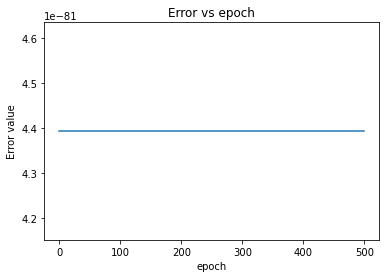

In [14]:
learning_rate = 0.1

x_plot = []
y_plot = []

for epoch in range(500):
    output = sigm(X, W, B)
    # diff_W size = (2, 15) ( .T = (15, 2) )
    # diff_B size = (15,)
    # W size = (1, 2)
    # output size = (15, 15) --> WHY IS THE OUTPUT THIS SIZE
    # Y size = (15,)

    W = W + (learning_rate * diff_W(X, output, Y, B, W).T)
    B = B + learning_rate * diff_B(X, output, Y, B, W)

    error = (Y - output)**2
    
    x_plot.append(epoch)
    y_plot.append(error[-1, -1]) # plotting the final error value for the final output

plt.plot(x_plot, y_plot)
plt.xlabel("epoch")
plt.ylabel("Error value")
plt.title("Error vs epoch")

**How the error changes with each iteration** </br>
The closer epoch gets to 500, the smaller the error is. This reduces linearly which can be seen in the graph:
- The plot shows no oscillations which suggests that the learning rate is not too large. When the learning rate was set to 100, the graph looked like the positive quadrant of a 1/x graph.
- The gradient can give us the learning rate.

**Increasing the number of iterations** </br>
The number of iterations was set to 1000, then 2000, then 40000 and finally 8000. In each case, the final error value got smaller, however, it never reached zero. When epoch = 8000, the final error value was 0.00011786992787626743. 

**Does the error go to zero? Why not? What could we do to make it exactly zero?**
Because the sigmoid is never actually 0 or 1! We do not want to use a perfect step function because it is non-differentiable and non-generalisable. 

For the error to go to zero, the output of the neuron must equal the correct output exactly. 

Whilst increasing the learning rate reduces the error, it will never reach zero. This is because we can't approximate the function exactly, it can never be an exact step function between 0 and 1.

Source: https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/ 

**Error vs epoch graph**
My plot shows a low learning rate.

For reference: </br>
![error vs epoch](images/epoch_learningrate.png)</br>
Source: https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

**Alternative methods to find the learning rate**
*Triangular method*
This method involves restarting the learning rate to the first value after so many iterations.


### Error vs learning rate

Text(0, 0.5, 'Error value')

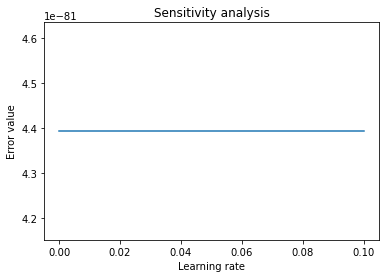

In [13]:
lrates = [0.1, 10e-3, 10e-4 , 10e-5] # this shows a flat line

y_plot = []

for i in lrates:

    for epoch in range(500):
        output = sigm(X, W, B)

        W = W + (i * diff_W(X, output, Y, B, W).T)
        B = B + i * diff_B(X, output, Y, B, W)

        error = (Y - output)**2
        
    y_plot.append(error[-1, -1]) # plotting the final error value for the final output

plt.figure(2)
plt.plot(lrates, y_plot)
plt.title("Sensitivity analysis")
plt.xlabel("Learning rate")
plt.ylabel("Error value")

**Error vs learning rate graph**
By reducing the learning rate to 10e-10, we reach a constant error shown by the flat line. This is most likely because the learning rate is so low that it never converges? Ideally, the error vs learning rate graph should look as follows:

![error vs epoch](images\loss_learningrate.png)</br>
Source: https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10 </br>

The number of epochs has been increased to account for the reduction in learning rate.

### More notes on XOR

<img src=".\images\lab2 (2).png" width="400"> <img src=".\images\lab2 (3).png" width="400"> </br>

The image on the left shows what a neuron is doing:
- The linear transform (Wx + b) describe the line that separates the points.
- We apply this linear transform to a single point (ie sub x into Wx + b).
- The linearly transformed point is inputted to the activation function.
- This outputs a value that is roughly either 1 or 0. 
    - (Although the output depends on the activation function, can also be -1 or 1).

The image on the right shows this too:
- _s_ is the function of this linear transform
- Each input is multiplied by a unique weight, therefore, _s_ is a sum of all the inputs.
    - If this isn't the first layer, the inputs will be all the neurons from the previous layer, which will be multiplied by their individual weights and summed.
- We adjust W and B until most of the points are classified.